<a href="https://colab.research.google.com/github/lalesafarzade/Recommendation_system_Project/blob/main/1.VIS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from ast import literal_eval
import requests
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('white')
%matplotlib inline
#from configs import api_key

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving movie.csv to movie.csv


In [ ]:
uploaded = files.upload()

Saving ratings.csv to ratings.csv


In [ ]:
movie_df=pd.read_csv('/content/movie.csv')
rating_df=pd.read_csv('/content/ratings.csv')

In [ ]:
df = pd.merge(rating_df,movie_df,on='movieId')
df.head()

,userId,movieId,rating,timestamp,imdbId,title,genres,year,directedBy,starring,avgRating
0,1,296,5.0,1147880044,110912,Pulp Fiction,Comedy|Crime|Drama|Thriller,1994,Quentin Tarantino,"John Travolta, Samuel L. Jackson, Tim Roth, Am...",4.1876
1,3,296,5.0,1439474476,110912,Pulp Fiction,Comedy|Crime|Drama|Thriller,1994,Quentin Tarantino,"John Travolta, Samuel L. Jackson, Tim Roth, Am...",4.1876
2,4,296,4.0,1573938898,110912,Pulp Fiction,Comedy|Crime|Drama|Thriller,1994,Quentin Tarantino,"John Travolta, Samuel L. Jackson, Tim Roth, Am...",4.1876
3,5,296,4.0,830786155,110912,Pulp Fiction,Comedy|Crime|Drama|Thriller,1994,Quentin Tarantino,"John Travolta, Samuel L. Jackson, Tim Roth, Am...",4.1876
4,7,296,4.0,835444730,110912,Pulp Fiction,Comedy|Crime|Drama|Thriller,1994,Quentin Tarantino,"John Travolta, Samuel L. Jackson, Tim Roth, Am...",4.1876


In [ ]:
import string
result=[]
gnre=df['genres'].to_list()
for i in range(len(gnre)):
  res=gnre[i]
  list_=res.split('|')
  for j in range(len(list_)):
    if not list_[j] in result:
      result.append(list_[j])


In [ ]:
def genre_maker(genre,df):
  res=[]
  for i in range(len(df)):
    if genre in df['genres'][i].split('|'):
      res.append(i)
  return df.iloc[res].assign(genres=genre)
Comedy_df=genre_maker('Comedy',movie_df)
Crime_df=genre_maker('Crime',movie_df)
Drama_df=genre_maker('Drama',movie_df)
Thriller_df=genre_maker('Thriller',movie_df)
War_df=genre_maker('War',movie_df)
Musical_df=genre_maker('Musical',movie_df)
Romance_df=genre_maker('Romance',movie_df)
Adventure_df=genre_maker('Adventure',movie_df)
FilmNoir_df=genre_maker('FilmNoir',movie_df)
SciFi_df=genre_maker('SciFi',movie_df)
Western_df=genre_maker('Western',movie_df)
Fantasy_df=genre_maker('Fantasy',movie_df)
Mystery_df=genre_maker('Mystery',movie_df)
Children_df=genre_maker('Children',movie_df)
Action_df=genre_maker('Action',movie_df)
Documentary_df=genre_maker('Documentary',movie_df)
Animation_df=genre_maker('Animation',movie_df)
Horror_df=genre_maker('Horror',movie_df)
IMAX_df=genre_maker('IMAX',movie_df)
unknown_df=genre_maker('(no genres listed)',movie_df)
unknown_df=unknown_df.assign(genres="NotMentioned")
genre_df=pd.concat([Comedy_df,Crime_df,Drama_df,Thriller_df,War_df,Musical_df,Romance_df,Adventure_df,FilmNoir_df,SciFi_df,Western_df,Fantasy_df,Mystery_df,Children_df,Action_df,Documentary_df,Animation_df,Horror_df,IMAX_df,unknown_df])
#from google.colab import files
#genre_df.to_csv('genre_df.csv',index=False) 
#files.download('genre_df.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## EDA & Visualizing

### Least rated movies

In [ ]:
rated_df=df.groupby('title')['rating'].mean().sort_values(ascending=False)
rated_df.tail(20)

title
Absolute Aggression (2004)                            0.5
The Expedition                                        0.5
Special Delivery (2008)                               0.5
Startling Proofs (1995)                               0.5
Paranormal Farm (2017)                                0.5
Covergirl (1984)                                      0.5
Old Man                                               0.5
The Strange Case of Dr. Jekyll and Mr. Hyde (2006)    0.5
Don't Hang Up (1975)                                  0.5
Nukie (1988)                                          0.5
Princes in the Tower (2005)                           0.5
From Above (2013)                                     0.5
Coyote Lake (2019)                                    0.5
Guilty by Association (2003)                          0.5
Synevir (2013)                                        0.5
Caro Gorbaciov (1988)                                 0.5
Don't Let Go (2019)                                   0.5
Ice Quee

### Most rated movies




In [ ]:
rated_df.head(100)

title
Full of Grace (2015)             5.0
Geordie (1955)                   5.0
Garfield In Paradise (1986)      5.0
Lost Woods (2012)                5.0
Garfield in the Rough (1984)     5.0
                                ... 
Lonely Boy (2013)                5.0
Going to the Mat (2004)          5.0
Sing (1989)                      5.0
Good Fortune (2009)              5.0
Good Morning Tri-State (2013)    5.0
Name: rating, Length: 100, dtype: float64

### Most rated movies based on IMDB


In [ ]:
movie_df[['avgRating','title']].sort_values(by='avgRating',ascending=False).head(10)

,avgRating,title
42853,5.0,Love Finds You In Sugarcreek
55735,5.0,Blue
27260,5.0,Waltz Across Texas
55693,5.0,"It’s All Right, It’s Ok"
33752,5.0,Gallows Road
55653,5.0,Panic
55651,5.0,Last Hours in Suburbia
55647,5.0,Cold War
55621,5.0,Top Secret Rosies: The Female 'Computers' of WWII
37488,5.0,Please Kill Mr. Know It All


#### Most watched rated movies

In [ ]:
most_popular_movies=df.groupby('title')['rating'].count().sort_values(ascending=False)
most_popular_movies.head(10)

title
Forrest Gump                          81491
Shawshank Redemption, The             81482
Pulp Fiction                          79672
Silence of the Lambs, The             74127
Matrix, The                           72674
Star Wars: Episode IV - A New Hope    68717
Jurassic Park                         64144
Schindler's List                      60411
Braveheart                            59184
Fight Club                            58773
Name: rating, dtype: int64

#### Least watched rated movies

In [ ]:
least_popular_movies=most_popular_movies.tail(10)
least_popular_movies

title
Hologram Man                                              1
The Stranger That Kneels Beside the Shadow of a Corpse    1
The Stranger Wore a Gun                                   1
Pardon My Sarong                                          1
The Stranger: Summoned by Shadows                         1
The Arbitration                                           1
The Strangler                                             1
The Arbalest                                              1
The April Chill                                           1
"BLOW THE NIGHT!" Let's Spend the Night Together          1
Name: rating, dtype: int64

#### Making a Ratings dataframe with average rating and number of ratings:

In [ ]:
ratings = pd.DataFrame(df.groupby('title')['rating'].mean())
ratings['num of ratings'] = pd.DataFrame(df.groupby('title')['rating'].count())
ratings.sort_values(by='rating',ascending=False).head(10)

,rating,num of ratings
title,,
Days of Power,5.0,1
Ramona,5.0,1
Everything Is Terrible! Presents: The Great Satan,5.0,1
Maciste in Hell of Genghis Khan,5.0,1
"Hijacking Catastrophe: 9/11, Fear & the Selling of American Empire",5.0,1
The End of Meat,5.0,1
The Ultimate Legacy,5.0,1
A Good Funeral,5.0,1
The Undefeated,5.0,1


### Visualizing

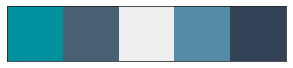

In [ ]:
# Set your custom color palette
movies_colors = ["#00909E", "#476072", "#EEEEEE", "#548CA8","#334257"]
sns.set_palette(sns.color_palette(movies_colors))
sns.palplot(movies_colors)

Text(0.5, 1.0, 'Distribution of Movies genres')

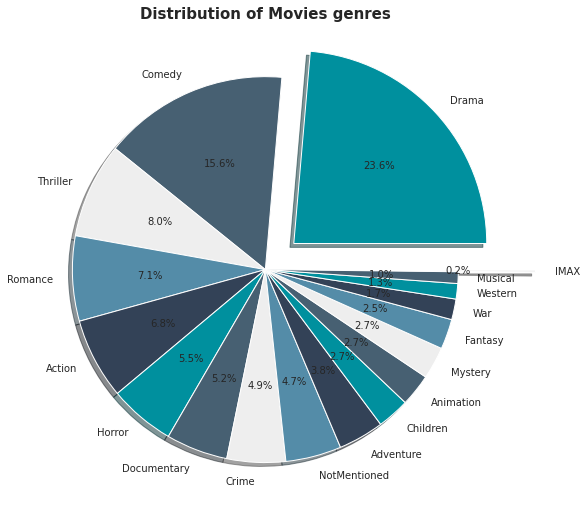

In [ ]:
plt.figure(figsize=(20,7))
explode = (0.2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.4)
plt.pie(genre_df['genres'].value_counts(),shadow=True,explode=explode,labels=genre_df['genres'].value_counts().index,autopct="%1.1f%%")
plt.tight_layout()
#plt.axis('equal')

plt.title('Distribution of Movies genres',fontsize= 15,pad=10,fontweight="bold")

### Distribution of number of rate based on rate

<Figure size 1440x504 with 0 Axes>

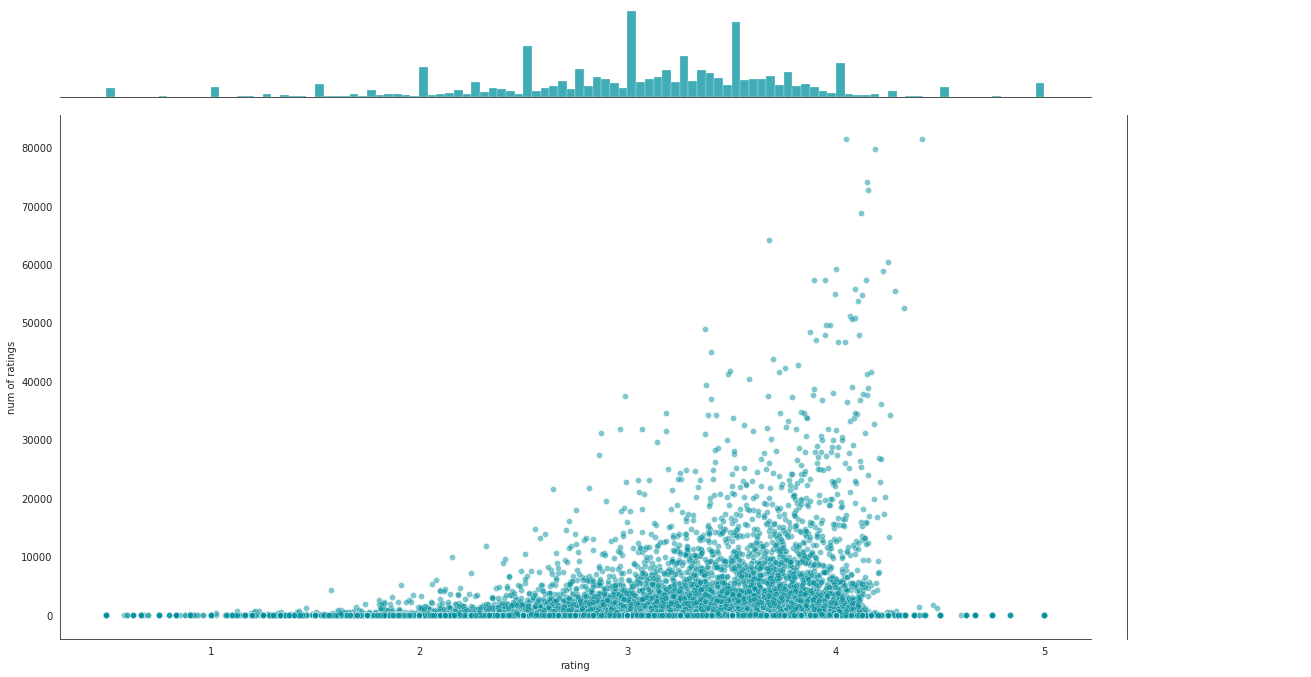

In [ ]:
plt.figure(figsize=(20,7))
sns.jointplot(x='rating',y='num of ratings',data=ratings,alpha=0.5)
plt.gcf().set_size_inches(20, 10)

### Distribution of User rating

Text(0.5, 1.0, 'Distribution of User rating')

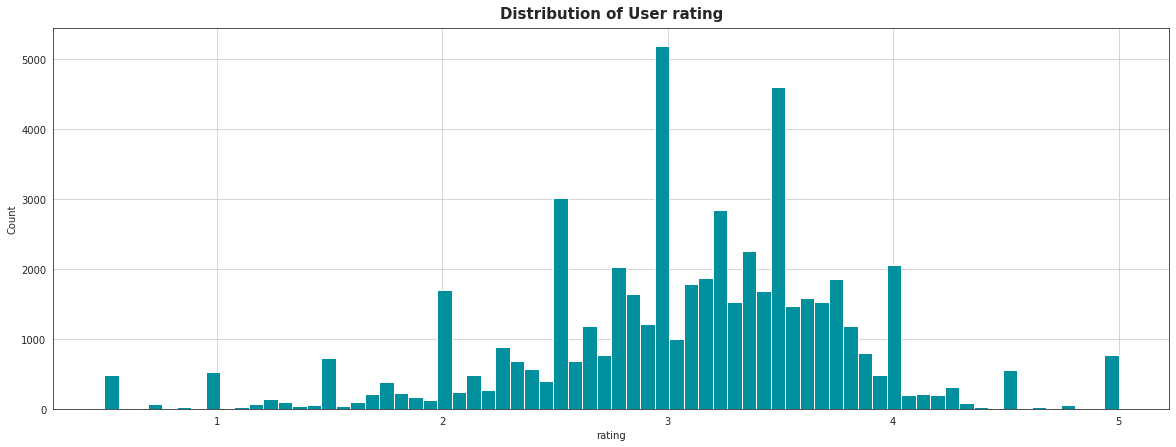

In [ ]:
plt.figure(figsize=(20,7))
ratings['rating'].hist(bins=70)
plt.ylabel("Count")
plt.xlabel("rating")
plt.title('Distribution of User rating',fontsize= 15,pad=10,fontweight="bold")

### Distribution of num of ratings


Text(0.5, 1.0, 'Distribution of num of ratings')

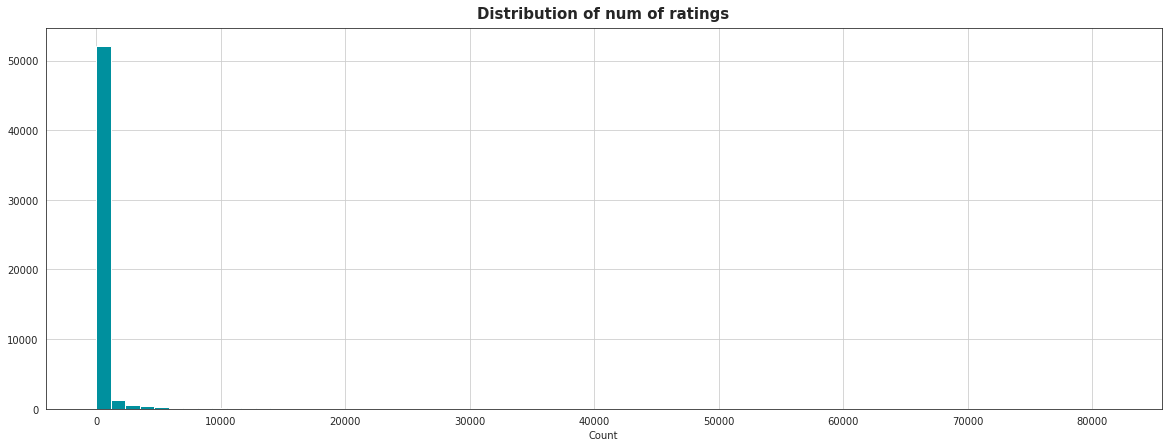

In [ ]:
plt.figure(figsize=(20,7))
ratings['num of ratings'].hist(bins=70)
plt.xlabel("Count")
plt.title('Distribution of num of ratings',fontsize= 15,pad=10,fontweight="bold")

### Distribution of IMDB avg rating versus user rating avg

Text(0.5, 1.0, 'Distribution of IMDB avg rating versus user rating avg')

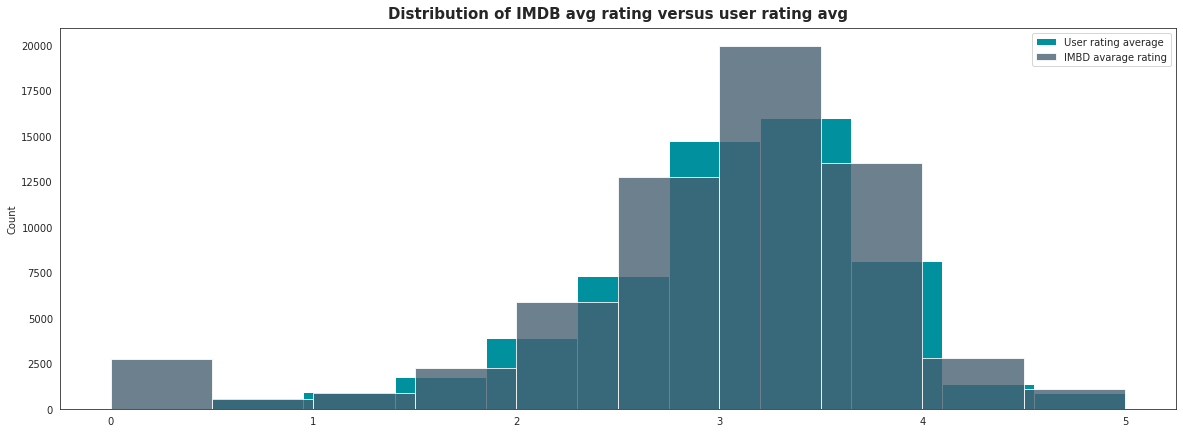

In [ ]:
plt.figure(figsize=(20,7))
ratings['rating'].plot(kind='hist',label='User rating average')
movie_df['avgRating'].plot(kind='hist',label='IMBD avarage rating',alpha=.8)
plt.legend()
plt.ylabel("Count")
plt.title('Distribution of IMDB avg rating versus user rating avg',fontsize= 15,pad=10,fontweight="bold")

### Top 10 Movie Directors with the most movies directing

Text(0.5, 1.0, 'Top 10 Movie Directors with the most movies directing')

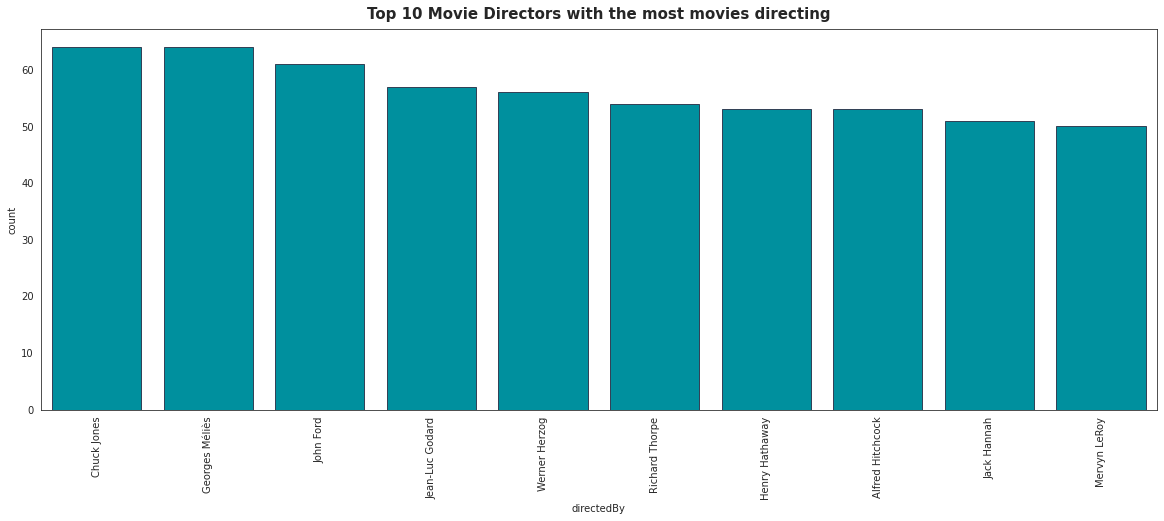

In [ ]:
movie_director=movie_df['directedBy'].value_counts().head(11).to_dict()
director_ls=[i for i in movie_director]
movie_dir_df=pd.concat([movie_df[movie_df['directedBy']==i] for i in director_ls[1:]])
plt.figure(figsize=(20,7))
sns.countplot(x='directedBy',data=movie_dir_df,facecolor='#00909E',edgecolor='#334257')
plt.xticks(rotation="vertical")
plt.title('Top 10 Movie Directors with the most movies directing',fontsize= 15,pad=10,fontweight="bold")

### Title wordcloud

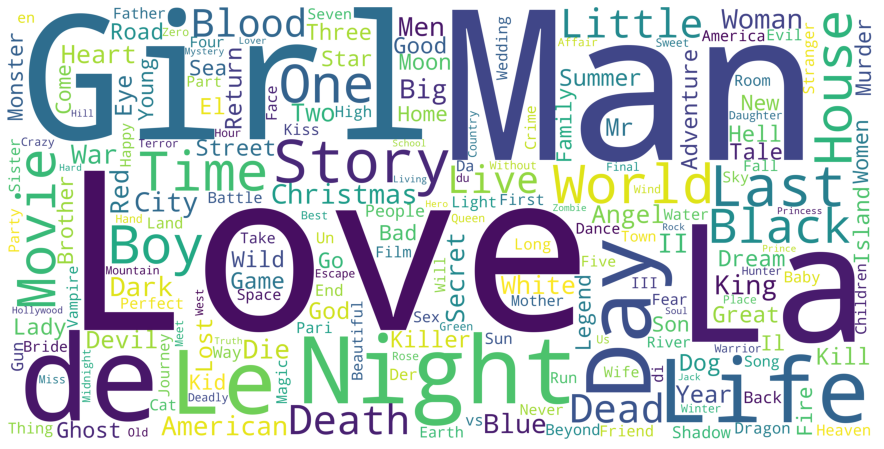

In [ ]:
from wordcloud import WordCloud, STOPWORDS
movie_df['title'] = movie_df['title'].astype('str')
title_corpus = ' '.join(movie_df['title'])
overview_wordcloud = WordCloud(stopwords=STOPWORDS, background_color='white', height=2000, width=4000).generate(title_corpus)
plt.figure(figsize=(16,8))
plt.imshow(overview_wordcloud)
plt.axis('off')
plt.show()

### Genres Wordcloud

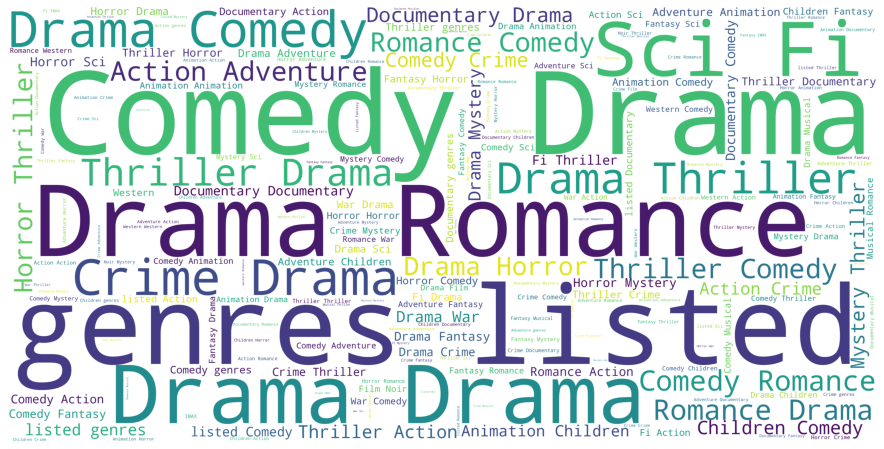

In [ ]:
movie_df['genres'] = movie_df['genres'].astype('str')
genres_corpus = ' '.join(movie_df['genres'])
overview_wordcloud = WordCloud(stopwords=STOPWORDS, background_color='white', height=2000, width=4000).generate(genres_corpus)
plt.figure(figsize=(16,8))
plt.imshow(overview_wordcloud)
plt.axis('off')
plt.show()

### Number of movies between 1995_2019

Text(0.5, 1.0, 'Number of movies between 1995_2019')

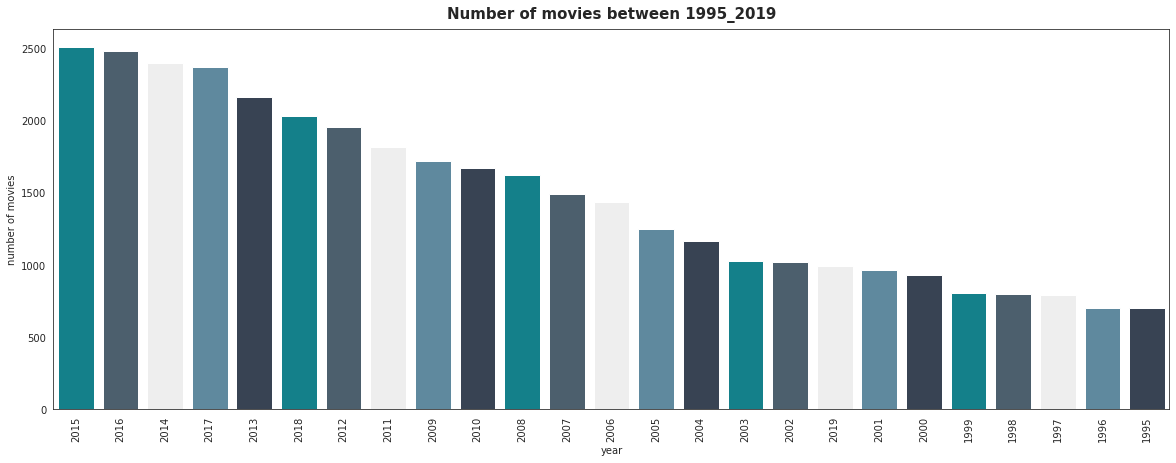

In [ ]:
year_df=movie_df['year'].value_counts().head(25).to_frame().reset_index()
year_df.columns=['year','number of movies']
plt.figure(figsize=(20,7))
sns.barplot(x='year',y='number of movies',data=year_df,palette=movies_colors)
plt.xticks(rotation="vertical")
plt.title('Number of movies between 1995_2019',fontsize= 15,pad=10,fontweight="bold")

### Most popular movies 

Text(0.5, 1.0, 'Most popular movies')

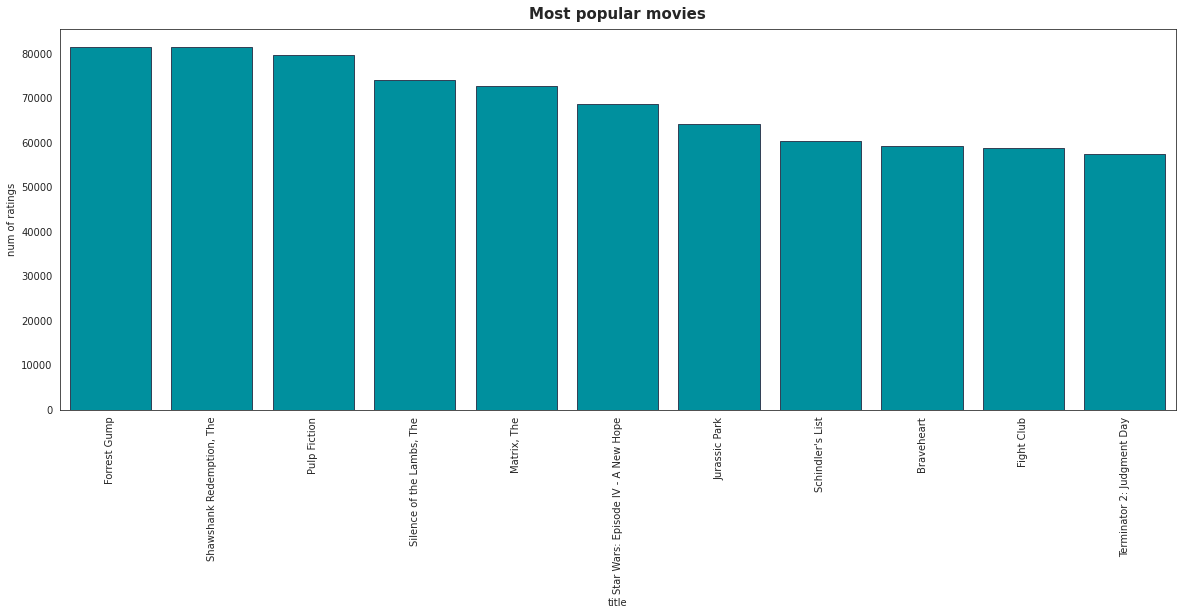

In [ ]:
most_popular=ratings.sort_values(by='num of ratings',ascending=False).head(11).reset_index()
plt.figure(figsize=(20,7))
sns.barplot(x='title',y='num of ratings',data=most_popular,facecolor='#00909E',edgecolor='#334257')
plt.xticks(rotation="vertical")
plt.title('Most popular movies',fontsize= 15,pad=10,fontweight="bold")

Top 10 Movie titles based on User rate

Text(0.5, 1.0, 'Top 10 Movie titles based on thier User rate')

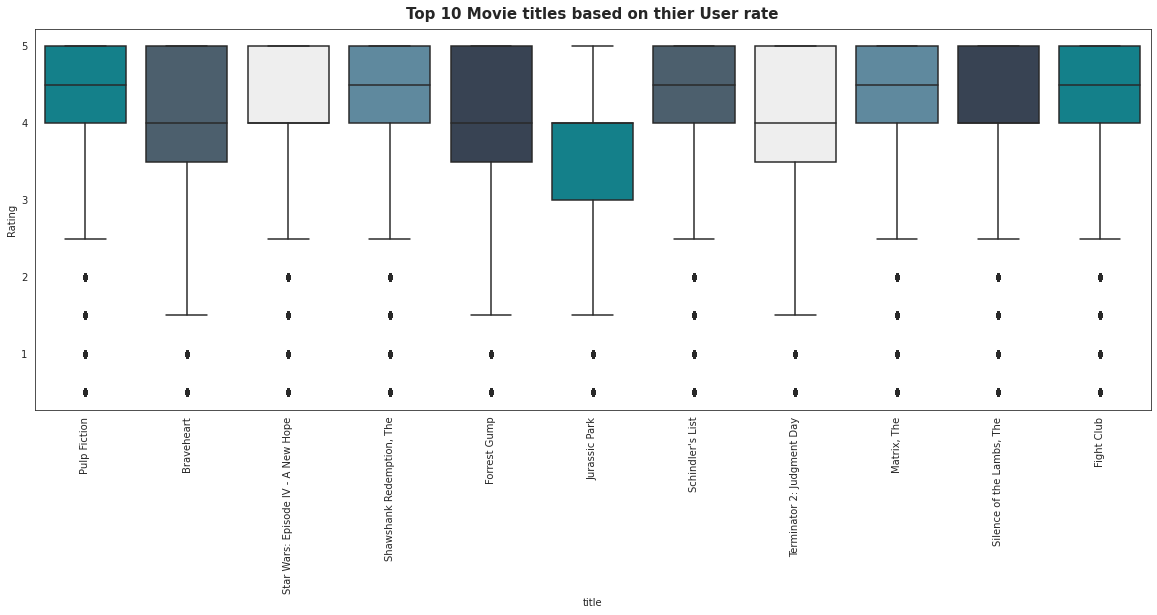

In [ ]:
most_popular_title=most_popular['title'].to_list()
df_popular=df[df['title'].isin(most_popular_title)]
plt.figure(figsize=(20,7))
sns.boxplot(x="title", y="rating", data=df_popular,palette=movies_colors)
plt.xticks(rotation="vertical")
plt.ylabel("Rating")
plt.title('Top 10 Movie titles based on thier User rate',fontsize= 15,pad=10,fontweight="bold")